In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry']]
blocks_gdf.head()

,geometry
id,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6..."
1,"POLYGON ((355412.142 6623378.149, 355411.700 6..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6..."


In [2]:
functional_zones_gdf = gpd.read_parquet('./../data/functional_zones.parquet').rename(columns={'zone': 'functional_zone'})
functional_zones_gdf.head()

,functional_zone,geometry
0,Т1Ж2-2,"MULTIPOLYGON (((349202.695 6660862.796, 349199..."
1,Т1Ж2-2,"MULTIPOLYGON (((345558.116 6666406.372, 345528..."
2,Т1Ж2-2,"MULTIPOLYGON (((347805.242 6663237.649, 347790..."
3,Т1Ж2-2,"MULTIPOLYGON (((346292.257 6667294.593, 346266..."
4,Т1Ж2-2,"MULTIPOLYGON (((350166.384 6660332.141, 350186..."


## Land use assignment

In [3]:
from blocksnet.common.enums import LandUse

rules = {
    "Т3Ж1": LandUse.RESIDENTIAL,
    "ТР0-2": LandUse.RECREATION,
    "Т3Ж2": LandUse.RESIDENTIAL,
    "Т1Ж2-1": LandUse.RESIDENTIAL,
    "Т2ЖД2": LandUse.RESIDENTIAL,
    "ТД1-3": LandUse.BUSINESS,
    "ТД2": LandUse.BUSINESS,
    "ТД3": LandUse.BUSINESS,
    "ТУ": LandUse.TRANSPORT,
    "ТИ4": LandUse.TRANSPORT,
    "ТД1-1": LandUse.RESIDENTIAL,
    "ТД1-2": LandUse.RESIDENTIAL,
    "ТПД1": LandUse.INDUSTRIAL,
    "ТПД2": LandUse.INDUSTRIAL,
    "ТИ1-1": LandUse.TRANSPORT,
    "Т3ЖД3": LandUse.RESIDENTIAL,
    "ТК1": LandUse.SPECIAL,
    "ТР2": LandUse.RECREATION,
    "ТИ2": LandUse.TRANSPORT,
    "ТР5-2": LandUse.RECREATION,
    "Т1Ж2-2": LandUse.RESIDENTIAL,
    "ТР4": LandUse.RECREATION,
    "ТР5-1": LandUse.RECREATION,
    "Т2Ж1": LandUse.RESIDENTIAL,
    "ТИ3": LandUse.TRANSPORT,
    "Т1Ж1": LandUse.RESIDENTIAL,
    "ТИ1-2": LandUse.TRANSPORT,
    "ТР3-2": LandUse.RECREATION,
    "ТР0-1": LandUse.RECREATION,
    "ТП2": LandUse.INDUSTRIAL,
    "ТК3": LandUse.SPECIAL,
    "ТР1": LandUse.RECREATION,
    "ТР3-1": LandUse.RECREATION,
    "ТС1": LandUse.AGRICULTURE,
    "ТК2": LandUse.SPECIAL,
    "ТП1": LandUse.INDUSTRIAL,
    "ТП3": LandUse.INDUSTRIAL,
    "ТП4": LandUse.INDUSTRIAL,
    "ТС2": LandUse.SPECIAL,
}

In [5]:
from blocksnet.blocks.assignment import assign_land_use

land_use_gdf = assign_land_use(blocks_gdf, functional_zones_gdf, rules)

2025-03-04 23:16:39.747 | INFO     | blocksnet.blocks.assignment.core:assign_land_use:33 - Overlaying geometries.
2025-03-04 23:16:49.108 | INFO     | blocksnet.blocks.assignment.core:assign_land_use:36 - Calculating shares.
2025-03-04 23:16:50.415 | SUCCESS  | blocksnet.blocks.assignment.core:assign_land_use:46 - Shares calculated.


In [17]:
land_use_gdf.head()

,geometry,fz_shares,fz_share,functional_zone,lu_shares,lu_share,land_use
id,,,,,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...","{'ТИ1-1': 0.0073089756377563465, 'ТИ3': 0.1346...",0.257336,ТР0-2,"{'recreation': 0.6802443208220899, 'transport'...",0.680244,recreation
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...","{'ТИ3': 0.5944823081128274, 'ТУ': 0.4055176918...",0.594482,ТИ3,{'transport': 0.9999999999999265},1.000000,transport
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...","{'ТК1': 7.279343387926487e-05, 'ТР2': 0.854630...",0.854630,ТР2,"{'recreation': 0.8546301171639951, 'special': ...",0.854630,recreation
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...","{'Т3Ж1': 0.3256852578708111, 'ТД1-2': 0.075124...",0.388883,ТУ,"{'residential': 0.40080970554371026, 'transpor...",0.599190,transport
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...","{'ТД1-1': 0.002241948221181749, 'ТР4': 0.85035...",0.850359,ТР4,"{'recreation': 0.8503588671827547, 'residentia...",0.850359,recreation


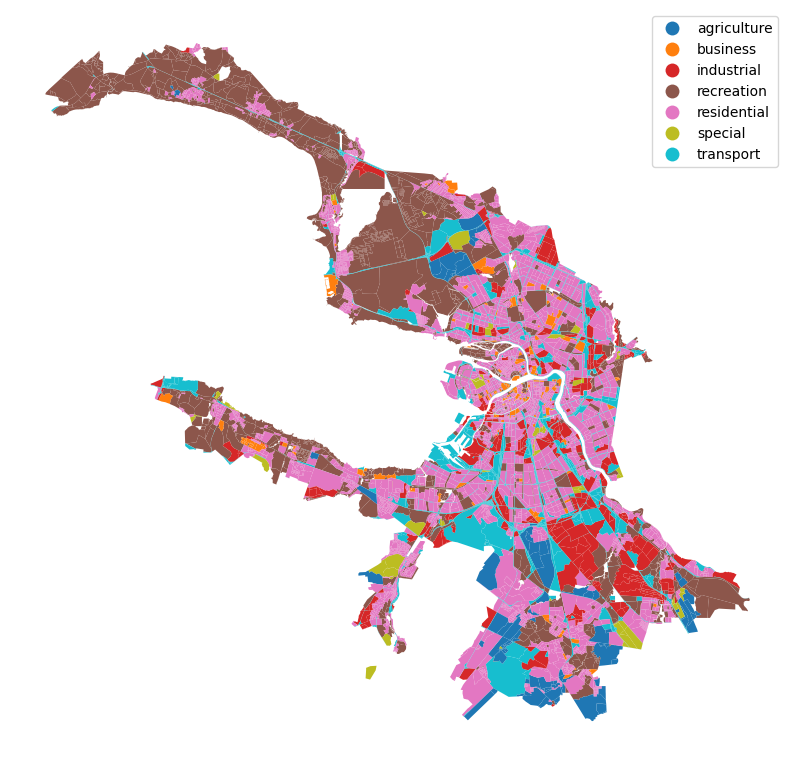

In [16]:
land_use_gdf.plot(column='land_use', legend=True, figsize=(10,10)).set_axis_off()

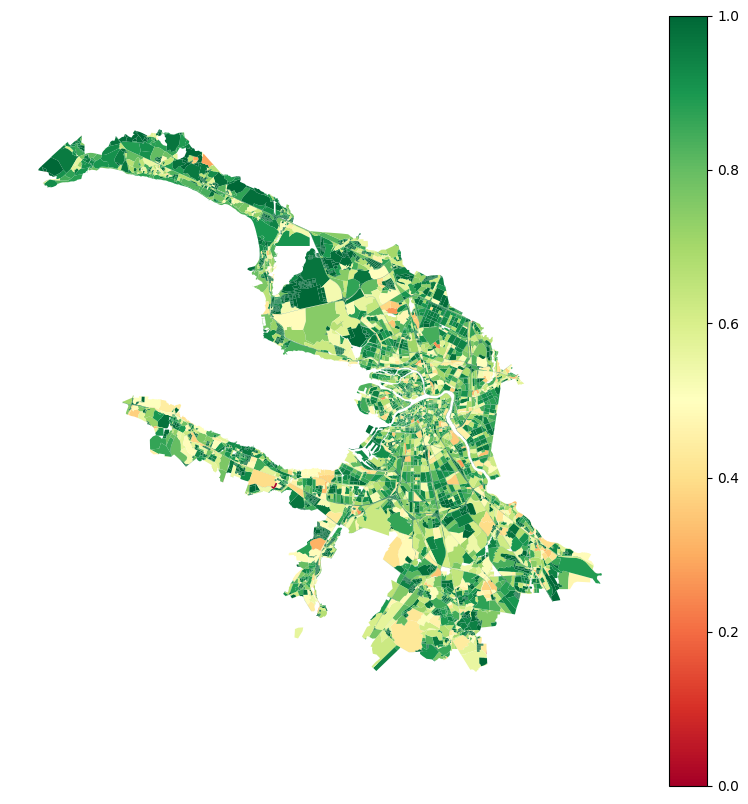

In [18]:
land_use_gdf.plot(column='lu_share', cmap='RdYlGn', legend=True, vmin=0, vmax=1, figsize=(10,10)).set_axis_off()